<a href="https://colab.research.google.com/github/Berkan66/CV-Group-Assignment-1/blob/build_faces_dataset/CV__Group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

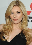

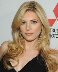

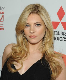

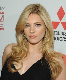

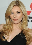

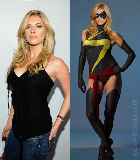

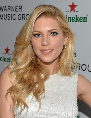

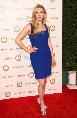

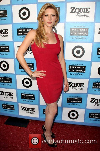

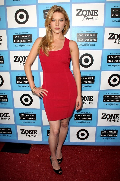

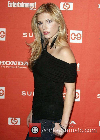

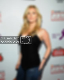

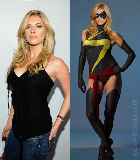

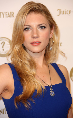

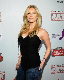

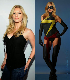

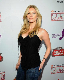

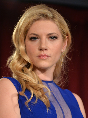

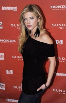

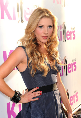

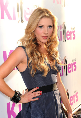

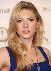

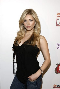

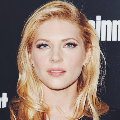

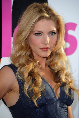

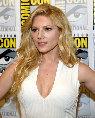

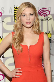

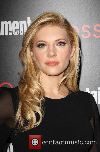

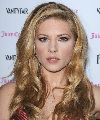

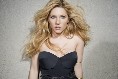

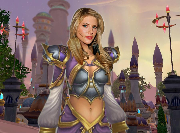

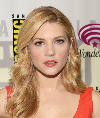

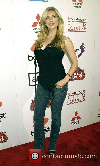

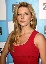

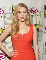

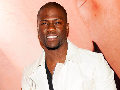

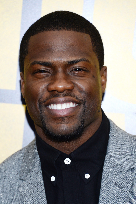

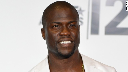

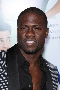

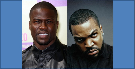

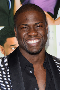

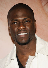

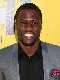

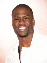

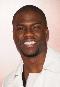

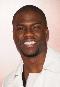

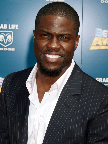

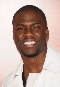

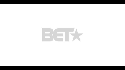

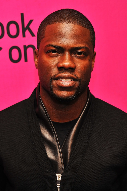

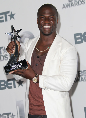

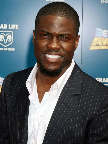

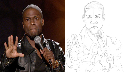

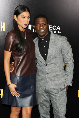

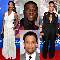

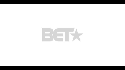

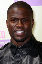

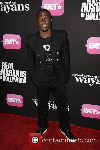

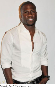

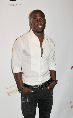

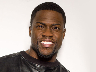

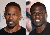

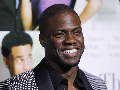

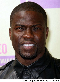

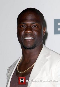

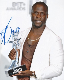

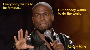

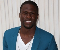

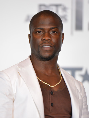

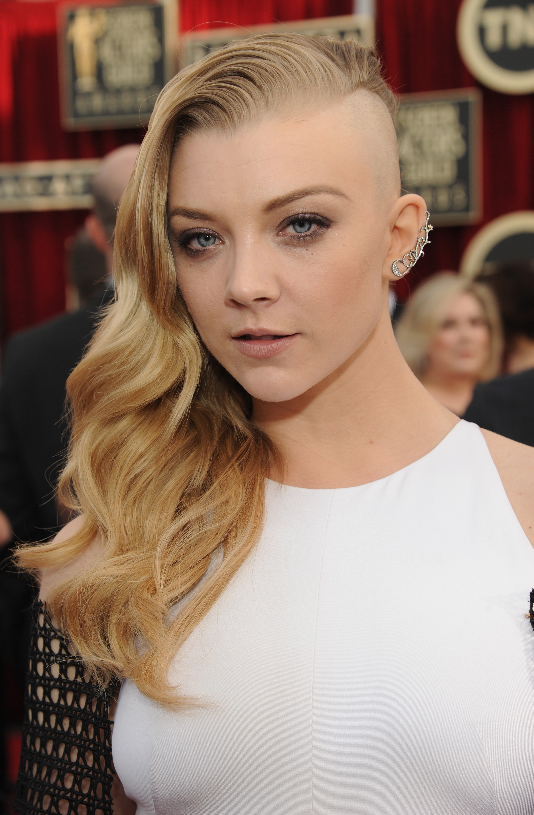

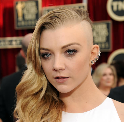

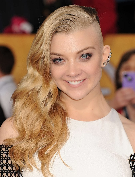

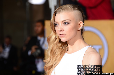

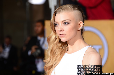

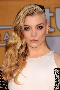

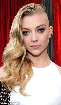

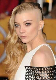

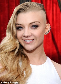

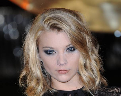

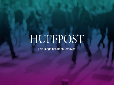

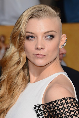

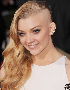

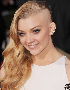

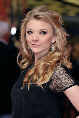

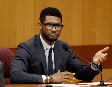

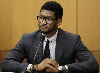

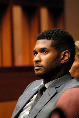

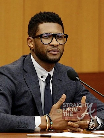

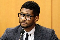

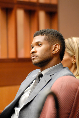

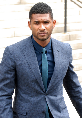

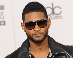

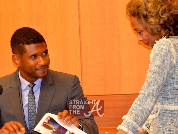

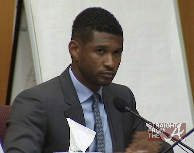

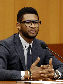

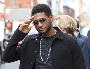

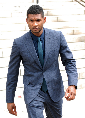

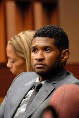

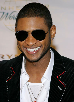

In [11]:
import os
import cv2
import tarfile
import numpy as np
from urllib import request
from google.colab import drive
from google.colab.patches import cv2_imshow


base_path = "/content/sample_data/CV__Group_assignment"

if not os.path.isdir(base_path):
  os.makedirs(base_path)

vgg_face_dataset_url = "http://www.robots.ox.ac.uk/~vgg/data/vgg_face/vgg_face_dataset.tar.gz"

with request.urlopen(vgg_face_dataset_url) as r, open(os.path.join(base_path, "vgg_face_dataset.tar.gz"), 'wb') as f:
  f.write(r.read())

with tarfile.open(os.path.join(base_path, "vgg_face_dataset.tar.gz")) as f:
  f.extractall(os.path.join(base_path))

trained_haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

with request.urlopen(trained_haarcascade_url) as r, open(os.path.join(base_path, "haarcascade_frontalface_default.xml"), 'wb') as f:
    f.write(r.read())


celebs = [ "Katheryn_Winnick.txt", "Kevin_Hart.txt", "Natalie_Dormer.txt", "Usher_Raymond.txt"]
all_subjects = [subject for subject in sorted(os.listdir(os.path.join(base_path, "vgg_face_dataset", "files"))) if subject.startswith(tuple(celebs)) and subject.endswith(".txt")]

# from celebs, person A - B - C - D
nb_subjects = 4
nb_images_per_subject = 35
nb_images_per_subject_train = 15

images = []
for subject in all_subjects[:nb_subjects]:

  with open(os.path.join(base_path, "vgg_face_dataset", "files", subject), 'r') as f:
    lines = f.readlines()

  images_ = []
  for line in lines:
    url = line[line.find("http://"): line.find(".jpg") + 4]

    try:
      res = request.urlopen(url)
      img = np.asarray(bytearray(res.read()), dtype="uint8")
      img = cv2.imdecode(img, cv2.IMREAD_COLOR)
      h, w = img.shape[:2]
      images_.append(img)
      cv2_imshow(cv2.resize(img, (w // 5, h // 5)))

    except:
      pass
    
    # Retrieve only 15 images for test data (some margin for invalid images) to reduce load
    if len(images_) == nb_images_per_subject_train and subject in ["Natalie_Dormer.txt", "Usher_Raymond.txt"]:
      images.append(images_)
      break

    if len(images_) == nb_images_per_subject:
      images.append(images_)
      break

# Manual preprocessing to remove look alike images
kat_prep = [0, 1, 2, 4, 9, 11, 12, 14, 15, 16, 20, 21,]
for index in sorted(kat_prep, reverse=True):
    del images[0][index]

del images[3][10:12]

Found 1 face(s)!
Face found, saving...


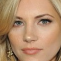

Found 1 face(s)!
Face found, saving...


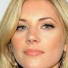

Found 1 face(s)!
Face found, saving...


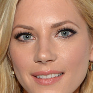

Found 1 face(s)!
Face found, saving...


Found 1 face(s)!
Face found, saving...


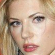

Found 1 face(s)!
Face found, saving...


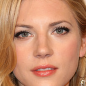

Found 1 face(s)!
Face found, saving...


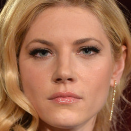

Found 1 face(s)!
Face found, saving...


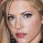

Found 1 face(s)!
Face found, saving...


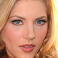

Found 1 face(s)!
Face found, saving...


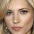

Found 1 face(s)!
Face found, saving...


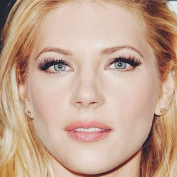

Found 1 face(s)!
Face found, saving...


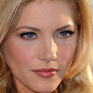

Found 1 face(s)!
Face found, saving...


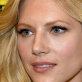

Found 1 face(s)!
Face found, saving...


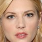

Found 1 face(s)!
Face found, saving...


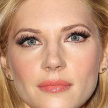

Found 1 face(s)!
Face found, saving...


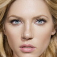

Found 1 face(s)!
Face found, saving...


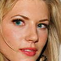

Found 1 face(s)!
Face found, saving...


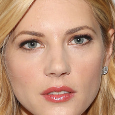

Found 1 face(s)!
Face found, saving...


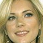

Found 1 face(s)!
Face found, saving...


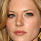

Found 1 face(s)!
Face found, saving...


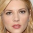

Found 1 face(s)!
Face found, saving...


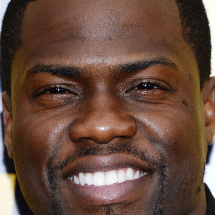

Found 1 face(s)!
Face found, saving...


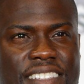

Found 1 face(s)!
Face found, saving...


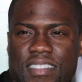

Found 1 face(s)!
Face found, saving...


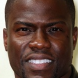

Found 1 face(s)!
Face found, saving...


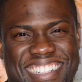

Found 1 face(s)!
Face found, saving...


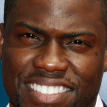

Found 1 face(s)!
Face found, saving...


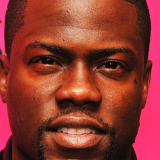

Found 1 face(s)!
Face found, saving...


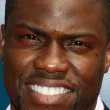

Found 1 face(s)!
Face found, saving...


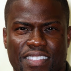

Found 1 face(s)!
Face found, saving...


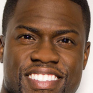

Found 1 face(s)!
Face found, saving...


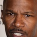

Found 1 face(s)!
Face found, saving...


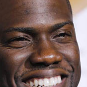

Found 1 face(s)!
Face found, saving...


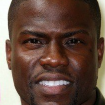

Found 1 face(s)!
Face found, saving...


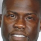

Found 1 face(s)!
Face found, saving...


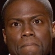

Found 1 face(s)!
Face found, saving...


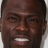

Found 1 face(s)!
Face found, saving...


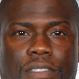

Found 1 face(s)!
Face found, saving...


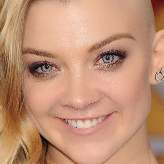

Found 1 face(s)!
Face found, saving...


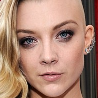

Found 1 face(s)!
Face found, saving...


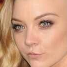

Found 1 face(s)!
Face found, saving...


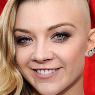

Found 1 face(s)!
Face found, saving...


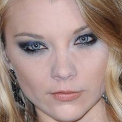

Found 1 face(s)!
Face found, saving...


Found 1 face(s)!
Face found, saving...


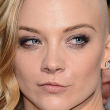

Found 1 face(s)!
Face found, saving...


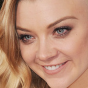

Found 1 face(s)!
Face found, saving...


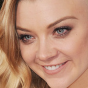

Found 1 face(s)!
Face found, saving...


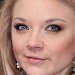

Found 1 face(s)!
Face found, saving...


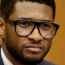

Found 1 face(s)!
Face found, saving...


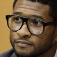

Found 1 face(s)!
Face found, saving...


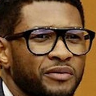

Found 1 face(s)!
Face found, saving...


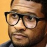

Found 1 face(s)!
Face found, saving...


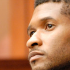

Found 1 face(s)!
Face found, saving...


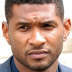

Found 1 face(s)!
Face found, saving...


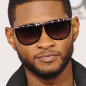

Found 1 face(s)!
Face found, saving...


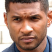

Found 1 face(s)!
Face found, saving...


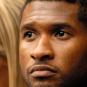

Found 1 face(s)!
Face found, saving...


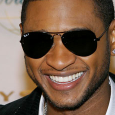

In [12]:
faceCascade = cv2.CascadeClassifier(os.path.join(base_path, "haarcascade_frontalface_default.xml"))

for idx, images_ in enumerate(images):
  for id, img in enumerate(images_):

    img_ = img.copy()
    img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        img_gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    # Only take into account one face 
    if len(faces) != 1:
      continue

    print("Found {} face(s)!".format(len(faces)))

    for (x, y, w, h) in faces:
        cv2.rectangle(img_, (x, y), (x+w, y+h), (0, 255, 0), 10)

        # Clips only the face in the image
        face_extraction = img[y:y+h, x:x+w]
        
        #Will delete this code after receiving a reply from the TA
        #Depending on if it is allowed to store the images or not, else load into a local array
        file_name = str(celebs[idx]) + str(id) + str(w) + str(h) + '.jpg'
        print('Face found, saving...')
        cv2.imwrite(os.path.join(base_path + "/data", file_name), face_extraction)
        
        cv2_imshow(cv2.resize(face_extraction, (w // 2, h // 2)))

    # Uncomment to see the original picture with a square around the face
    #h, w = img_.shape[:2]
    #cv2_imshow(cv2.resize(img_, (w // 5, h // 5)))

# Feature Extraction


Limited pictures of person A, B, C, D at the moment but will increase it at a later time. Also need to make some plot to make an overview of these images. But we can do that later I think? 

It is also possible that you need to make a folder called data under CV__Group_assignment.

Person A = Katheryn, Female/Blond/White, she has nice similarities with person C and clear distinguisable from person B and D.

Person B = Kevin Hart, Male/Buzz Cut/Black, she has nice similarities with person D and clear distinguisable from person A and C

Person C = Natalie, Female/Blond/White, she has nice similarities with person A and clear distinguisable from person B and D

Person B = Usher, Male/Buzz Cut/Black, she has nice similarities with person D and clear distinguisable from person A and C

Person A = Katheryn, Female/Blond/White, she has nice similarities with person C and clear distinguisable from person B and D.
Person B = Kevin Hart, Male/Buzz Cut/Black, she has nice similarities with person D and clear distinguisable from person A and C.
Person C = Natalie, Female/Blond/White, she has nice similarities with person A and clear distinguisable from person B and D.
Person B = Usher, Male/Buzz Cut/Black, she has nice similarities with person D and clear distinguisable from person A and C.


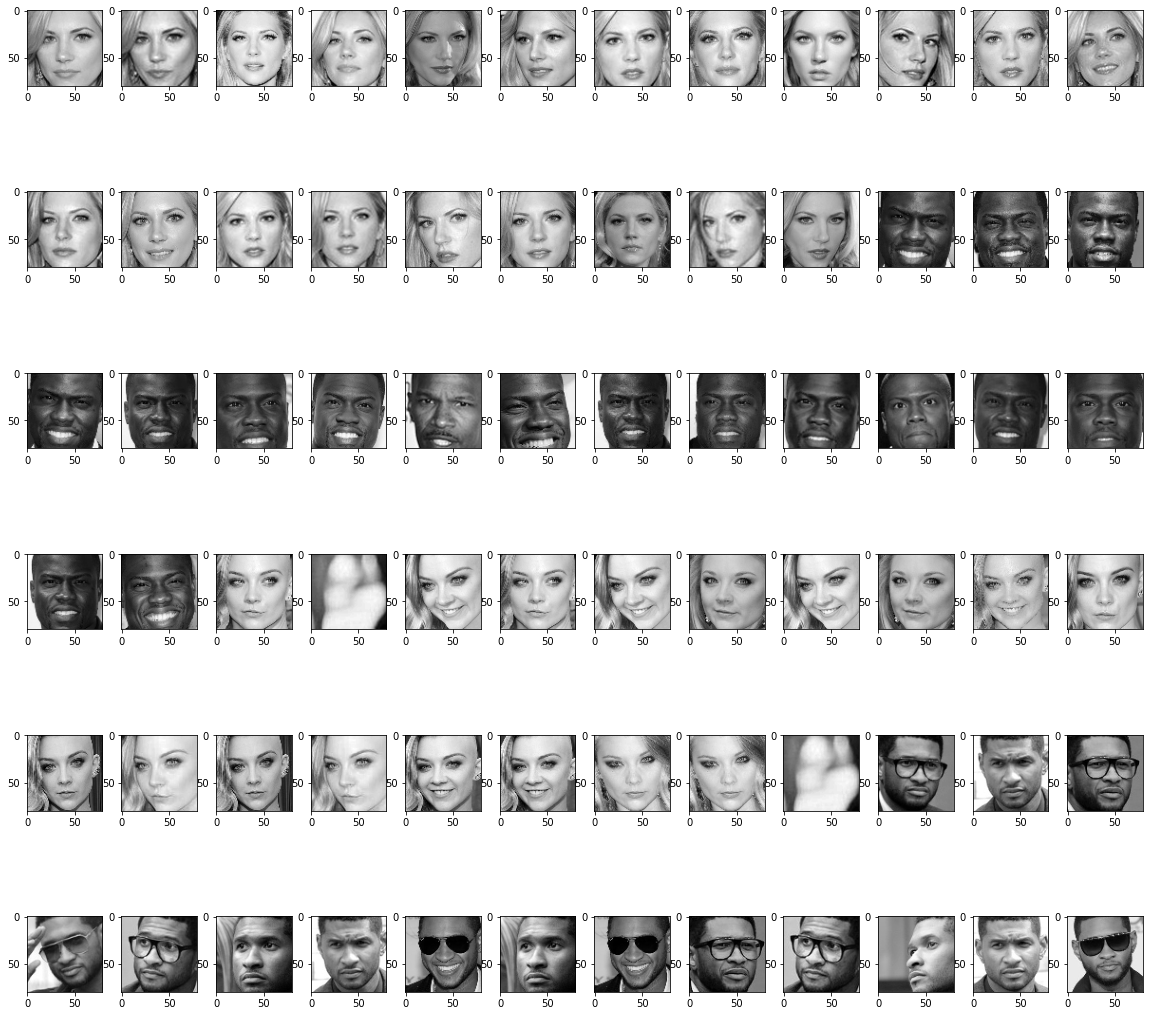

In [46]:
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = glob.glob(base_path + "/data/*.jpg")
filenames.sort()

# List of images under CV__Group_assignment/data, contains the faces of the celebrities
faces = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in filenames]
faces = [cv2.resize(img, (80, 80), interpolation=cv2.INTER_CUBIC) for img in faces]

sz = faces[0].shape
data = np.zeros((len(faces), sz[0] * sz[1]), dtype=np.uint8)
for i in range(len(faces)):
    data[i, :] = faces[i].flatten()
f, axs = plt.subplots(6,12, figsize=(20,20))
plt.subplots_adjust(hspace=0.00, wspace=0.25)

for i in range(6):
    for j in range(12):
        axs[i,j].imshow(faces[i*12+j], cmap=plt.cm.gray)
